### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이

#### (1) 모듈 로딩 및 데이터 준비 <hr>

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [92]:
data_file = '../data/fish.csv'

In [93]:
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [94]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
perchDF = fishDF[fishDF['Species']=='Perch']
perchDF = perchDF.reset_index(drop=True)

In [95]:
# 추출된 데이터 기본 정보 확인
perchDF.info(), perchDF.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


(None,
   Species  Weight  Length
 0   Perch     5.9     8.4
 1   Perch    32.0    13.7
 2   Perch    40.0    15.0
 3   Perch    51.5    16.2
 4   Perch    70.0    17.4)

In [96]:
# 수치 컬럼의 데이터 정보 확인
perchDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


#### (3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값 고유값
- 산점도, 히스토그램

####  (3-1) 데이터 분포

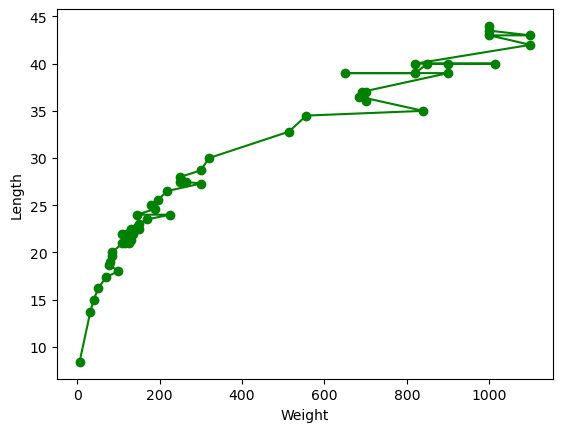

In [97]:
# 무게와 길이에 대한 시각화

plt.plot(perchDF.Weight, perchDF.Length, 'go-')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [98]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [99]:
## [분석 결과] 무게에 따른 길이는 비례관계
# 무게 + 연산 ===> 길이
perchDF.iloc[:3]

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0


In [105]:
model = perchDF.Weight/5
perchDF['Length']-model.abs().sum() 

0    -4272.68
1    -4267.38
2    -4266.08
3    -4264.88
4    -4263.68
5    -4263.08
6    -4262.38
7    -4262.08
8    -4261.48
9    -4261.08
10   -4260.08
11   -4260.08
12   -4260.08
13   -4259.78
14   -4259.08
15   -4259.08
16   -4259.08
17   -4259.08
18   -4259.08
19   -4258.58
20   -4258.58
21   -4258.38
22   -4258.08
23   -4257.58
24   -4257.08
25   -4257.08
26   -4256.48
27   -4256.08
28   -4255.48
29   -4254.58
30   -4253.78
31   -4253.58
32   -4253.58
33   -4253.58
34   -4253.08
35   -4252.38
36   -4251.08
37   -4248.28
38   -4246.58
39   -4246.08
40   -4244.58
41   -4245.08
42   -4244.08
43   -4244.08
44   -4242.08
45   -4242.08
46   -4242.08
47   -4241.08
48   -4241.08
49   -4241.08
50   -4241.08
51   -4239.08
52   -4238.08
53   -4238.08
54   -4237.58
55   -4237.08
Name: Length, dtype: float64

In [106]:
model[:3]

0    1.18
1    6.40
2    8.00
Name: Weight, dtype: float64

In [107]:
perchDF['Length']-model.abs().sum()
# or (model-perchDF['Length']).sum()


0    -4272.68
1    -4267.38
2    -4266.08
3    -4264.88
4    -4263.68
5    -4263.08
6    -4262.38
7    -4262.08
8    -4261.48
9    -4261.08
10   -4260.08
11   -4260.08
12   -4260.08
13   -4259.78
14   -4259.08
15   -4259.08
16   -4259.08
17   -4259.08
18   -4259.08
19   -4258.58
20   -4258.58
21   -4258.38
22   -4258.08
23   -4257.58
24   -4257.08
25   -4257.08
26   -4256.48
27   -4256.08
28   -4255.48
29   -4254.58
30   -4253.78
31   -4253.58
32   -4253.58
33   -4253.58
34   -4253.08
35   -4252.38
36   -4251.08
37   -4248.28
38   -4246.58
39   -4246.08
40   -4244.58
41   -4245.08
42   -4244.08
43   -4244.08
44   -4242.08
45   -4242.08
46   -4242.08
47   -4241.08
48   -4241.08
49   -4241.08
50   -4241.08
51   -4239.08
52   -4238.08
53   -4238.08
54   -4237.58
55   -4237.08
Name: Length, dtype: float64

#### (4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression

In [108]:
# 모델 인스턴스 생성
model = LinearRegression()

In [110]:
# 학습
model.fit(perchDF[['Weight']], perchDF['Length'])

LinearRegression()

In [117]:
# 학습 후 속성 확인
print(f'피쳐에 할당되는 가중치 (x항)계수 : {model.coef_}')
print(f'수식에 사용되는 절편          : {model.intercept_}')

피쳐에 할당되는 가중치 (x항)계수 : [0.02487985]
수식에 사용되는 절편          : 18.382802913636723


In [118]:
(perchDF['Weight']*model.coef_) + model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

#### (5) 테스트 <hr>

In [133]:
# 결정계수 R^2 즉, 얼마나 정답에 가깝고 근사하게 결과를 예측해내는지를 나타내는 계수 값
# 범위 : 0.0 ~ 1.0
# 1.0에 가까울수록 잘 만들어진 모델
model.score(perchDF[['Weight']], perchDF.Length)

0.9190210732447819

In [137]:
y_pre = model.predict(perchDF[['Weight']])
y_pre = np.round(y_pre,1)
y_pre

array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
       21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
       22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
       24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
       40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
       43.3])

In [139]:
# 오차 계산 => 예측값 - 정답
errorSR = y_pre - perchDF.Length
errorSR

0     10.1
1      5.5
2      4.4
3      3.5
4      2.7
5      2.9
6      1.6
7      1.4
8      0.9
9      0.5
10     0.1
11     0.2
12     0.5
13     0.3
14    -0.6
15    -0.6
16    -0.4
17    -0.3
18    -0.9
19    -0.9
20    -0.4
21    -0.7
22    -0.9
23    -0.9
24     0.0
25    -2.0
26    -1.5
27    -2.1
28    -2.3
29    -2.7
30    -1.5
31    -2.6
32    -2.5
33    -2.9
34    -3.4
35    -2.9
36    -3.7
37    -1.6
38    -2.3
39     4.3
40    -1.1
41    -0.2
42    -1.2
43    -1.5
44     1.8
45    -4.4
46    -0.2
47    -0.5
48     0.8
49     3.6
50    -1.2
51     3.8
52     0.3
53     2.8
54    -0.2
55    -0.7
Name: Length, dtype: float64

In [130]:
np.round(y_pre,1), perchDF.Length

(array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
        21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
        22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
        24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
        40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
        43.3]),
 0      8.4
 1     13.7
 2     15.0
 3     16.2
 4     17.4
 5     18.0
 6     18.7
 7     19.0
 8     19.6
 9     20.0
 10    21.0
 11    21.0
 12    21.0
 13    21.3
 14    22.0
 15    22.0
 16    22.0
 17    22.0
 18    22.0
 19    22.5
 20    22.5
 21    22.7
 22    23.0
 23    23.5
 24    24.0
 25    24.0
 26    24.6
 27    25.0
 28    25.6
 29    26.5
 30    27.3
 31    27.5
 32    27.5
 33    27.5
 34    28.0
 35    28.7
 36    30.0
 37    32.8
 38    34.5
 39    35.0
 40    36.5
 41    36.0
 42    37.0
 43    37.0
 44    39.0
 45    39.0
 46    39.0
 47    40.0
 48    40.0
 49    40.0
 50    40.0
 5

In [146]:
(errorSR**2).sum() / errorSR.shape[0] # 분산

6.483571428571426

In [147]:
# 정답과 완벽히 똑같은 갯수 찾기
errorSR[(y_pre-perchDF.Length) == 0.0]

24    0.0
Name: Length, dtype: float64

#### (6) 성능평가 <hr>
- 결정계수 값 : 1.0에 가까울 수록 좋음
- 오차평균 값 : 낮을 수록 좋음
- 활용  모듈 : sklearn.metrics

In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn

print(sklearn.__version__)

1.3.0


In [149]:
# 결정 계수 값
r2_score(perchDF.Length, y_pre)

0.918891577369194

In [150]:
# 평균제곱오차 : MSE
mean_squared_error(perchDF.Length, y_pre)

6.483571428571426

In [156]:
# 루트평균제곱오차 : RMSE - 1.4 버전에 추가
# root_mean_squared_eroor(perchDF.Length, y_pre) 아래 식으로도 가능
mean_squared_error(perchDF.Length, y_pre, squared=False)

2.5462858104642194

In [151]:
# 평균절대값오차
mean_absolute_error(perchDF.Length, y_pre)

1.8535714285714282

##### 성능평가 지표 
성능평가 지표는 보통 의뢰하는 쪽이 정함